# Project 1: Company Data (High Sales Prediction)

Objective

Identify which attributes cause high sales using a Random Forest model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("Company_Data.csv")
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

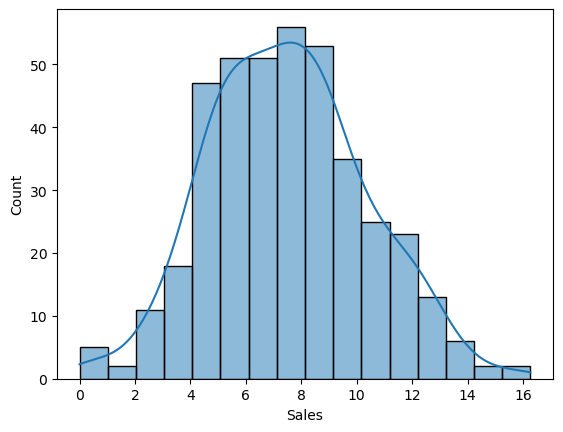

In [5]:
sns.histplot(df['Sales'], kde=True)
plt.show()

In [6]:
# Convert Sales into Categorical
df['Sales_Category'] = pd.cut(
    df['Sales'],
    bins=[0, 8, 12, df['Sales'].max()],
    labels=['Low', 'Medium', 'High']
)


In [7]:
df.drop('Sales', axis=1, inplace=True)


In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
X = df.drop('Sales_Category_High', axis=1)
y = df['Sales_Category_High']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.89
[[88  0]
 [11  1]]
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        88
        True       1.00      0.08      0.15        12

    accuracy                           0.89       100
   macro avg       0.94      0.54      0.55       100
weighted avg       0.90      0.89      0.85       100



In [12]:
feature_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_imp.head(10)

Price                    0.203020
Advertising              0.149610
Population               0.121734
CompPrice                0.110946
Age                      0.099224
Income                   0.077811
ShelveLoc_Good           0.067801
Sales_Category_Medium    0.064530
Education                0.059897
US_Yes                   0.018028
dtype: float64

# Interpretation
Attributes with highest importance → key drivers of high sales